# Question 9B: RK4 Method

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = \frac{x^{3}}{y} $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 10 $

Step Size $ h = 0.01 $

Actual Solution $ y(x) = \sqrt{\frac{1}{2}x^{4}+1} $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_xy(x,y):
    return (x**3*y)


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 10 $.
### Interval
The step Size will be $h = 0.01$

with the discrete time steps,
$$ x_{i} = 0 + i0.01 $$
for  $i=0,1,...,1000$.

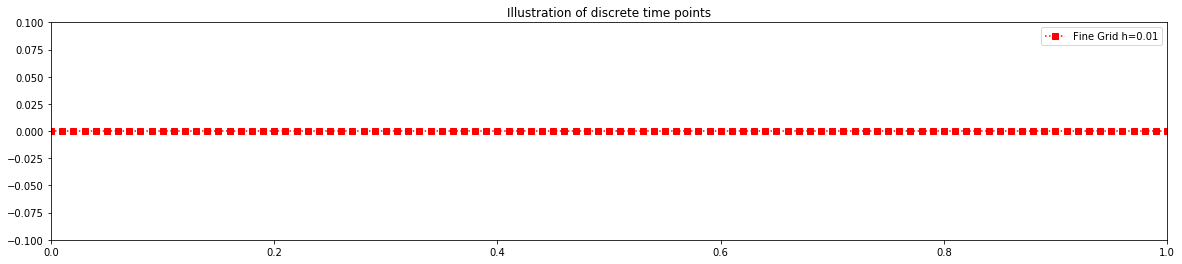

In [3]:
# Start and end of interval
b=2
a=0
# Steps N1=400
N1=200
h1=0.01


x1=np.arange(a,b+h1,h1)
#x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))
#plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,1))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

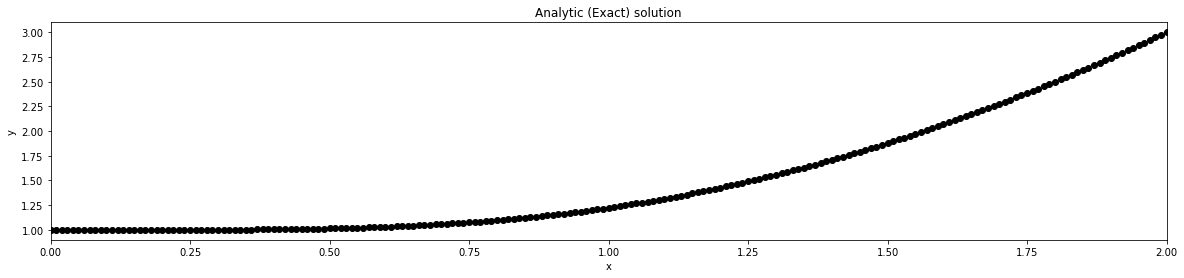

In [4]:
## Analytic Solution y
y1= (0.5*x1**4+1)**0.5


fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black')
#plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,2))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 1 $$

In [5]:
# Initial Condition
IC=1
w1=np.zeros(N1+1)
w1[0]=IC


## 4th Order Runge Kutta
The general form of the 4th order Runge Kutta is:
$$
\begin{align*}
k_{1}&=hf(x_{i},w_{i}),  \\
k_{2}&=hf(x_{i}+\frac{h}{2},w_{i}+\frac{1}{2}k_{1}),  \\
k_{3}&=hf(x_{i}+\frac{h}{2},w{i}+\frac{1}{2}k_{2}),  \\
k_{4}&=hf(x_{i}+h,w_{i}+k_{3}),  \\
w_{i+1}&=w_{i} +\frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}). \\
\end{align*}
$$




Text(0.5, 1.0, 'Analytic and RK4 Method solution')

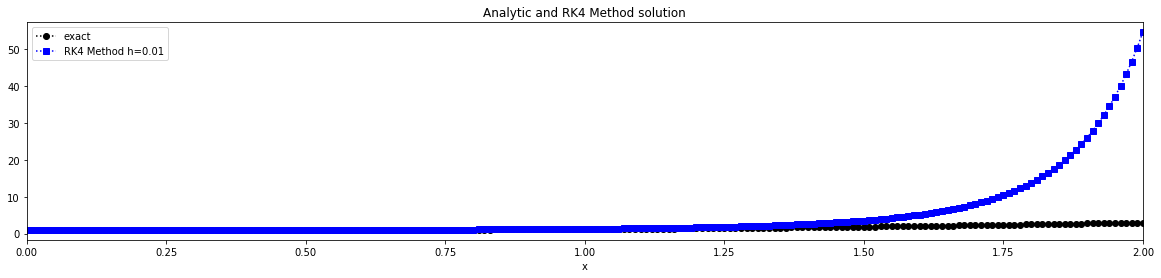

In [8]:
for k in range (0,N1):
    k1=h1*myfun_xy(x1[k],w1[k])
    k2=h1*myfun_xy(x1[k]+h1/2,w1[k]+1/2*k1)
    k3=h1*myfun_xy(x1[k]+h1/2,w1[k]+1/2*k2)
    k4=h1*myfun_xy(x1[k]+h1,w1[k]+k3)
    w1[k+1]=w1[k]+1/6*(k1+2*k2+2*k3+k4)
    

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='RK4 Method h=0.01')

plt.xlim((0,2))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and RK4 Method solution')


In [9]:
table = ListTable()
table.append(['x', 'w1 RK4 h=0.01', 'Exact',
              'RK4 Err 0.01', '% Err RK4 0.01'])
tableSize = 20
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(y1[i],5),
                  round(abs(y1[i]-w1[i]),8), 
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' 
              , round(max(abs(y1-w1)),5)])
table

x,w1 RK4 h=0.01,Exact,RK4 Err 0.01,% Err RK4 0.01
0.0,1.0,1.0,0.0,0.0
0.01,1.0,1.0,0.0,0.0
0.02,1.0,1.0,0.0,0.0
0.03,1.0,1.0,0.0,0.0
0.04,1.0,1.0,0.0,0.0
0.05,1.0,1.0,0.0,0.0
0.06,1.0,1.0,0.0,0.0
0.07,1.00001,1.00001,0.0,0.0
0.08,1.00001,1.00001,0.0,0.0
0.09,1.00002,1.00002,0.0,0.0
